&nbsp;

# 1. Basic Exploration
Data exploration is a crucial step to understanding the underlying patterns and relationships inside your dataset. The most effective way to improving your output is not by tuning hyperparameters or trying out more complex models, it is in fact improving the quality of your data. Some tehcniques used to improve the quality of your dataset include: building new features, removing outliers and handling missing data. 

In [1]:
# Standard libraries. 
import pandas as pd
import numpy as np 
import os
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import visuals # Importing plot functions py file. 

# Splitting the dataset. 
from sklearn.model_selection import train_test_split

# Import transformers.
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Converts plotly output into static images, so it can be viewed inside github repository. 
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
root = os.getcwd() 
df = pd.read_csv(r"{}\data.csv".format(root))
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


&nbsp;

### Section A: Data Exploration
In this section we'll be focusing on cleaning and preparing our data so that it can be in a format fit to be ingested by an algorithm.

**A.1: Encoding the Target Variable**<br> The first step is to encode our labelled data. We'll use a simple pandas replace function to map out our binary encoded values. The reason we won't use the LabelEncoder transformer is because the values assigned are random. We on the otherhand specifically want B=0 and M=1.

In [3]:
# Assigning B as our negative class [0] and M as our positive class [1]. 
df["diagnosis"] = df["diagnosis"].replace(to_replace = ["B", "M"], value = [0, 1])
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


**A.2: Setting Aside a Validation Set**<br> In this section we'll randomly shuffle our entire dataset and set aside a validation set to test our finalised model on at the end of the project.

In [4]:
filterLabel = list(df.columns) # Storing all features into a list.
filterLabel.remove("diagnosis") # Removing "diagnosis" from our filter. 

# Splitting the data into features and label. 
X = df[filterLabel] # Filtering dataframe to exclude label. 
y = df["diagnosis"] # Label. 

# Creating train and test splits, with a validation size % of 0.2.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)
testData = pd.concat([X_test, y_test], axis=1) # Appending the test labels and features together to set aside as the holdout set. 
trainData = pd.concat([X_train, y_train], axis=1) # Creating the dataset we'll train our model on. 

testData.to_csv(r"{}\test.csv".format(root), index=False) # Exporting the test set to set aside for later. 
trainData.to_csv(r"{}\train.csv".format(root), index=False) # Exporting the train set to use as our main dataset. 
testData.head(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
14,84667401,13.73,22.61,93.60,578.3,0.11310,0.22930,0.212800,0.080250,0.2069,...,32.01,108.80,697.7,0.1651,0.77250,0.69430,0.22080,0.3596,0.14310,1
334,897374,12.30,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,0.1539,...,28.46,84.53,544.3,0.1222,0.09052,0.03619,0.03983,0.2554,0.07207,0


**A.3: Statistical Insights**<br> The next step is to gain insight on our data and learn about its underlying structure, this could be useful in understanding the correlation our features have towards the label.

In [5]:
nulls = df.isnull().sum().sum() # Check for missing values.
print(f"There is a total of: {nulls} missing values inside our dataset.")

There is a total of: 0 missing values inside our dataset.


In [6]:
df.info() # Insight on shape of data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe() # Statistical summary. 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


* From our analysis we can conclude that there are no missing values, and that our entire dataset is numerical (excluding our dependant variable).

&nbsp;

### Section B: Distribution
Now it's time to check out the distribution of each numerical feature. We'll plot the first and last 4 features, as visualizing 32 features requires too much space. 

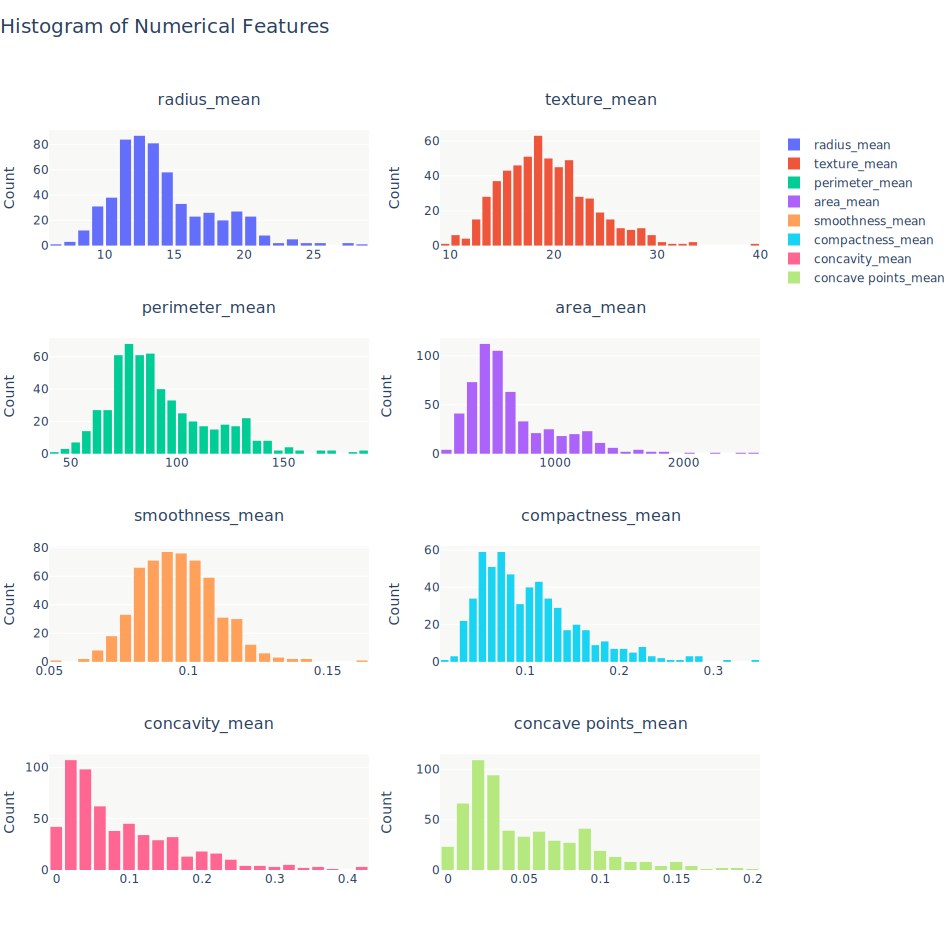

In [8]:
visuals.histogram(df=df)

* So we have mixture of Gaussian and Positive skewed distributions.
* Transforms such as logarithmic or Normalized dataset are useful for converting skewed data into a symmetrical distribution.

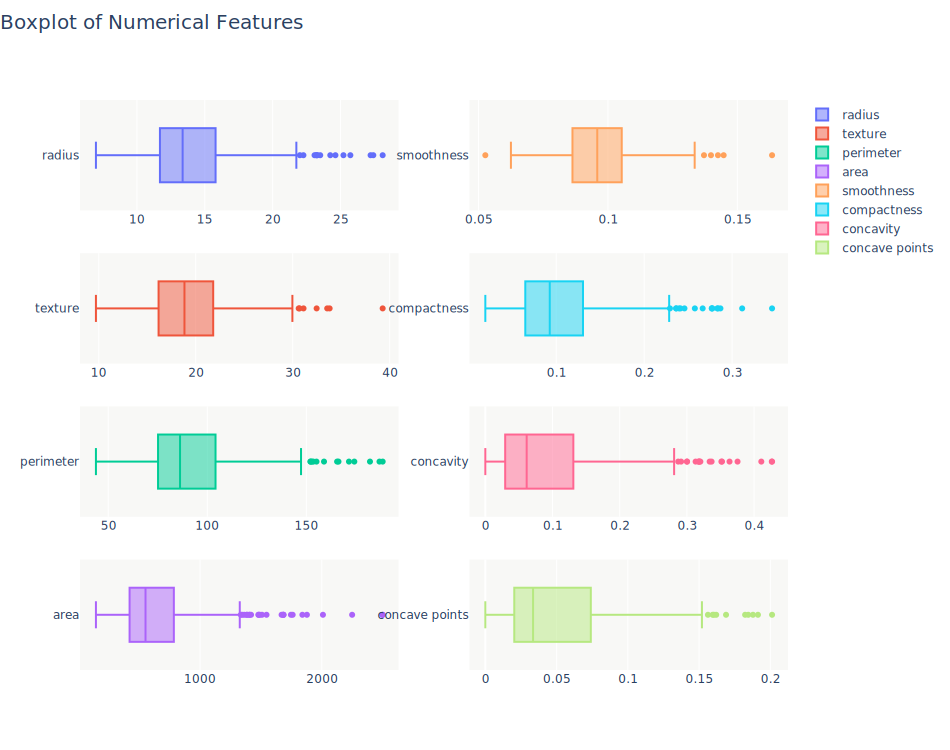

In [9]:
visuals.boxplot(df=df)

* Basically our boxplots tells us the same information as our histograms, however we can more clearly see some outliers outside our whiskers.
* In the case of outliers we should only remove them if they are considered "sample error". Based on the boxplots, the distance between the outliers and rest of the data isn't too extreme to infer "sample error", so I'll be leaving them in.

&nbsp;

&nbsp;
**Author:** Aaron Chew&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **|** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Date Published:** 11/08/2022 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**|** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Email:** aaronsamuelchew@gmail.com &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**|**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **GitHub:** https://github.com/aaron-chew  